# 哈利波特

## 相关包

In [8]:
import jupyterthemes.jtplot as jtplot
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import jieba, codecs
import jieba.posseg as pseg
from pyecharts.charts import Bar
from wordcloud import WordCloud
import warnings
from os import path  #用来获取文档的路径
#词云
from PIL import Image
import matplotlib.pyplot as plt
#词云生成工具
from wordcloud import WordCloud,ImageColorGenerator
#需要对中文进行处理
import matplotlib.font_manager as fm


jtplot.style()
warnings.filterwarnings('ignore')  # 忽略警告
np.set_printoptions(suppress=True)

import matplotlib as mpl
mpl.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题,或者转换负号为字符串

## 词云

Building prefix dict from the default dictionary ...
Loading model from cache D:\Temp\jieba.cache
Loading model cost 0.906 seconds.
Prefix dict has been built successfully.


(-0.5, 399.5, 199.5, -0.5)

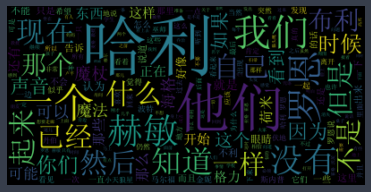

In [4]:
filename = "哈利波特_J.K.罗琳.txt"
with open(filename, "rb") as f:
    mytext = f.read()
mytext = " ".join(jieba.cut(mytext))

wordcloud = WordCloud().generate(mytext)

plt.axis("off")
wordcloud = WordCloud(font_path="simsun.ttf").generate(mytext)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [12]:
#导入人名、停用词、特定词库
renmings = pd.read_csv('renwu.csv',names=['renming'])['renming']
stopwords1 = pd.read_excel('stopwords.xlsx',names=['stopwords'])['stopwords']
book = open('哈利波特_J.K.罗琳.txt','rb').read()

#定义一个分词函数
def words_cut(book):
    words = list(jieba.cut(book))
    stopwords2 = [w for w in words if len(w)==1]
    seg = set(words)-set(stopwords1)-set(stopwords2)    #过滤停用词，得到更为精确的分词
    result = [i for i in words if i in seg]
    return result

#初次分词
bookwords = words_cut(book)
renming = [i.split(' ')[0] for i in set(renmings)] #只要人物名字，出掉词频以及词性
nameswords = [i for i in bookwords if i in set(renming)]  #筛选出人物名字

#统计词频
bookwords_count = pd.Series(bookwords).value_counts().sort_values(ascending=False)
nameswords_count = pd.Series(nameswords).value_counts().sort_values(ascending=False)

#自定义部分词语
jieba.add_word('邓布利多',100,'nr')
jieba.add_word('霍格沃茨',100,'n')
jieba.add_word('乌姆里奇',100,'nr')
jieba.add_word('拉唐克斯',100,'nr')
jieba.add_word('伏地魔',100,'nr')
jieba.del_word('罗恩说')
jieba.del_word('地说')
jieba.del_word('斯内')
jieba.del_word('格力')
jieba.del_word('弗来')

#再次分词
bookwords = words_cut(book)
nameswords = [i for i in bookwords if i in set(renming)]
bookwords_count = pd.Series(bookwords).value_counts().sort_values(ascending=False)
nameswords_count = pd.Series(nameswords).value_counts().sort_values(ascending=False)
bookwords_count.drop(index='\r\n')


哈利      18625
罗恩       4649
赫敏       3539
教授       2204
魔杖       1924
        ...  
富丽堂皇        1
是非之地        1
病体          1
灰豆          1
爸会          1
Length: 40248, dtype: int64

No handles with labels found to put in legend.


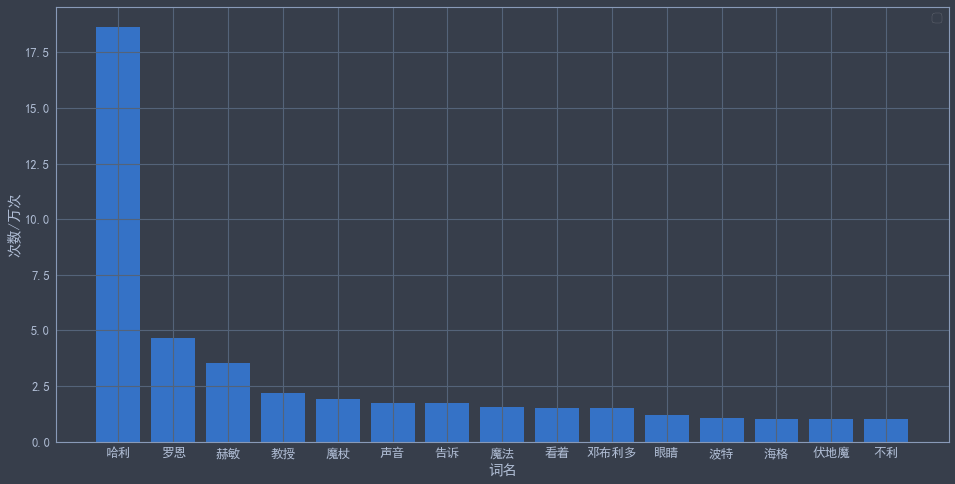

In [14]:
#统计词频TOP15的词语
X = bookwords_count.index[1:16]
y = bookwords_count.values[1:16]/1000
plt.figure(figsize=(16,8))
plt.bar(X, y )
plt.xlabel("词名")
plt.ylabel("次数/万次")
plt.legend()
plt.show()

## 提取姓名关系

In [2]:
filename = "哈利波特_J.K.罗琳.txt"
with open(filename, "rb") as f:
    content = f.readlines()

pdict = {
    '哈利': ['哈利', '波特', '哈利-波特'],
    '金妮': ['金妮', '金妮-韦斯莱'],
    '罗恩': ['罗恩', '罗罗', '罗恩-韦斯莱'],
    '小天狼星': ['小天狼星', '大脚板', '巴拉克', '西里斯', '布莱克'],
    '卢平': ['卢平', '狼人', '月亮脸', '露平'],
    '赫敏': ['赫敏', '赫米恩', '荷米思'],
    '邓布利多': ['邓布利多', '阿不思', '阿不思-邓布利多', '艾伯斯', '丹伯多'],
    '斯内普': ['斯内普', '混血王子', '西弗勒斯'],
    '小矮星彼得': ['小矮星', '彼得', '虫尾巴', '小矮星彼得', '斯卡伯斯', '彼德吉雷'],
    '伏地魔': ['那个男人', '伏地魔', '汤姆', '里德尔', '汤姆-里德尔', '福尔迪默特', '福尔得摩特'],
    '詹姆斯': ['尖头叉子', '詹姆斯-波特', '杰姆斯'],
    '纳威': ['纳威', '尼维尔'],
    '马尔福': ['马尔福', '杰高', '杰高。马尔福'],
    '莉莉': ['莉莉'],
    '弗农姨父': ['杜斯利先生', '维能姨丈', '威能先生', '姨丈'],
    '佩妮姨妈': ['杜斯利夫人', '帕尤妮亚姨妈', '玛各', '玛各姨妈', '杜斯利', '帕尤妮亚'],
    '麦格教授': ['麦格', '麦康娜', '麦康娜教授', '麦格教授', '米勒娃', '麦康娜', '麦托勒'],
    '达力': ['达德里', '达利', '达力'],
    '海格': ['哈格力', '海格', '巨人', '鲁伯', '鲁贝斯'],
    '奇洛教授': ['奇洛', '屈拉', '屈拉教授'],
    '海罗薇': ['海罗薇', '海维'],
    '弗雷德': ['弗来德', '弗莱德', '孪生兄弟', '弗雷德'],
    '乔治': ['乔治', '韦斯莱兄弟'],
    '帕西': ['伯希', '伯西', '珀西', '帕西', '伊阁内修斯'],
    '比尔': ['比尔', '阿瑟'],
    '伍德': ['伍德'],
    '罗克哈特教授': ['罗克哈特', '罗克哈特教授'],
    '李乔丹': ['乔丹', '李'],
    '疯眼汉穆迪': ['穆迪', '疯眼汉'],
    '胖夫人': ['胖夫人'],
    '无头的尼克': ['尼克'],
    '血人巴罗': ['血人巴罗', '巴罗'],
    '秋张': ['卓', '张', '张秋', '张秋', '卓秋'],
    '厄罗尔猫头鹰': ['厄罗尔'],
    '弗利维教授': ['弗利维'],
    '斯普劳特教授': ['波莫娜', '斯普劳特'],
    '辛尼斯塔教授': ['辛尼斯塔'],
    '宾斯教授': ['宾斯'],
    '霍琦夫人': ['霍琦夫人'],
    '平斯夫人': ['平斯夫人'],
    '费尔奇': ['费尔奇'],
    '庞弗雷夫人': ['波皮', '庞弗雷夫人', '波姆弗雷'],
    '迪安': ['迪安', '托马斯'],
    '西莫': ['西莫', '斐尼甘'],
    '克拉布': ['克拉布'],
    '高尔': ['高尔', '格雷德克'],
    '潘西': ['潘西', '帕金森'],
    '奥利凡德先生': ['奥利凡德'],
    '汉娜': ['汉娜', '艾博'],
    '厄尼': ['厄尼', '麦克米兰'],
    '苏珊': ['苏珊', '阿米利娅'],
    '安吉丽娜': ['安吉丽娜', '约翰逊'],
    '艾莉娅': ['艾莉娅', '斯平内特'],
    '贝尔': ['凯蒂', '贝尔'],
    '洛哈特': ['吉德罗', '洛哈特'],
    '卢修斯': ['卢修斯'],
    '纳西莎': ['纳西莎'],
    '阿布科萨斯': ['阿布科萨斯'],
    '埃德加': ['埃德加'],
    '奈杰勒斯': ['菲尼亚斯', '奈杰勒斯'],
    '艾朵拉': ['艾朵拉'],
    '阿克莱彻斯': ['雷古勒斯', '阿克莱彻斯'],
    '阿尔法达': ['阿尔法达'],
    '克劳奇': ['巴蒂', '克劳奇'],
    '多比': ['多比'],
    '闪闪': ['闪闪'],
    '唐克斯': ['尼法朵拉', '唐克斯', '唐克丝'],
    '泰德': ['安多米达'],
    '福吉': ['福吉', '康奈利', '部长'],
    '奥古斯塔': ['奥古斯塔'],
    '罗道夫斯': ['罗道夫斯'],
    '贝拉特里克斯': ['贝拉特里克斯', '莱斯特兰奇'],
    '艾丽斯': ['艾丽斯'],
    '弗兰克': ['弗兰克', '布莱奇'],
    '斯坦': ['斯坦', '桑帕克'],
    '伯莎': ['伯莎', '乔金斯'],
    '金斯莱': ['金斯莱', '沙克尔'],
    '斯拉格霍恩': ['霍拉斯', '斯拉格霍恩'],
    '费格': ['阿拉贝拉', '费格'],
    '科林': ['科林'],
    '阿莫斯': ['阿莫斯'],
    '克鲁姆': ['维克多尔', '克鲁姆'],
    '芙蓉': ['芙蓉', '伊莎贝拉'],
    '丽塔': ['丽塔', '斯基特'],
    '卡卡洛夫': ['伊戈尔', '卡卡洛夫'],
    '马克西姆夫人': ['奥利姆', '马克西姆夫人'],
    '卢娜': ['露娜', '洛夫古德', '疯丫头', '卢娜'],
    '谢诺菲留斯': ['谢诺菲留斯', '洛夫古德'],
    '亚瑟': ['亚瑟'],
    '莫丽': ['莫丽', '韦斯莱夫人'],
}


# 判断na是哪个人物
def getPerson(na):
    for key, value in pdict.items():
        if (na in value):
            return str(key)
    return '无'


def getPeopleNetwork():
    plist = list(pdict.keys())
    N = len(plist)
    pcount = np.zeros([N, N])
    # 初始化 人物频数 二维矩阵
    pcount = pd.DataFrame(data=pcount, columns=plist, index=plist)

    # 频数计算
    print("正在计算频数，请耐心等待，也可以怒而砸机，建议砸机(^-^)")
    for sentence in content:
        s_plist = []  # 出现的人物集合
        words = jieba.cut(sentence)
        for w in words:
            if (getPerson(w) != '无' and getPerson(w) not in s_plist):
                s_plist.append(getPerson(w))
        # 根据出现的人物集合 进行频数+1
        for p1 in s_plist:
            for p2 in s_plist:
                pcount.loc[p1][p2] += 1

    # 保存频数二维矩阵
    pcount.to_excel('结果/人物频数矩阵.xlsx')
    print('频数矩阵已完成')

    # 根据频数二维矩阵 计算 人物1-人物2-权重
    p_network = []
    for i in np.arange(N):
        for j in np.arange(i + 1, N):
            if i != j:
                p_network.append([plist[i], plist[j], pcount.iloc[i, j]])

    # 保存 边-权重
    p_network = pd.DataFrame(data=p_network, columns=['人物1', '人物2', 'count'])
    p_network.to_excel('结果/权重.xlsx')
    print('权重矩阵已完成')


getPeopleNetwork()

Building prefix dict from the default dictionary ...
Loading model from cache D:\Temp\jieba.cache


正在计算频数，请耐心等待，也可以怒而砸机，建议砸机(^-^)


Loading model cost 1.950 seconds.
Prefix dict has been built successfully.


频数矩阵已完成
权重矩阵已完成
